# _Multilayer Perceptron (MLP)_

### Importação de bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de gráficos
import matplotlib.pyplot as plt

# Classificador MLP
from sklearn.neural_network import MLPClassifier 

# Divisão do dataset
from sklearn.model_selection import train_test_split, cross_val_score

# Métricas de desempenho
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# [CONFIG] Ignorar avisos
from warnings import filterwarnings
filterwarnings("ignore")

### Modificação do arquivo CSV

In [2]:
# Lê o dataset e armazena no DataFame 'cvd'
cvd = pd.read_csv("covid_dataset.csv")

# Substitui os booleanos por inteiros
cvd = cvd.replace({"Yes": 1, "No": 0})

# Salva o DataFrame modificado em um novo CSV 'covid_new'
cvd.to_csv("covid_new.csv", index=False)

### Leitura do novo arquivo CSV

In [3]:
cvd = pd.read_csv("covid_new.csv")

### Manipulação de dados

In [4]:
# Seleciona os valores
values = cvd.iloc[:, :-1].values

# Seleciona os labels
labels = cvd.iloc[:, -1:].values

### Divisão do dataset

In [5]:
# Separa os valores e labels de treino e teste
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, test_size=0.3, random_state=42)

### Dicionário de modelos

In [6]:
# Dicionário contendo variações do modelo de MLP padrão
models = {
    "Default": MLPClassifier(random_state=1),
    "Forced Underfitting": MLPClassifier(random_state=1, max_iter=10),
    "Forced Overfitting": MLPClassifier(random_state=1, max_iter=10000),
    "Increased Hidden Layers Sizes": MLPClassifier(random_state=1, hidden_layer_sizes=(500,)),
    "Decreased Hidden Layers Sizes": MLPClassifier(random_state=1, hidden_layer_sizes=(10,)),
    "Logistic Activation Function": MLPClassifier(random_state=1, activation="logistic"),
    "Identity Activation Function": MLPClassifier(random_state=1, activation="identity"),
    "LBFGS Solver": MLPClassifier(random_state=1, solver="lbfgs"),
    "SGD Solver": MLPClassifier(random_state=1, solver="sgd"),
    "Adaptive Learning Rate": MLPClassifier(random_state=1, learning_rate="adaptive"),
    "Invscaling Learning Rate": MLPClassifier(random_state=1, learning_rate="invscaling")
}

### Análise de desempenho

-Default Results-
Cross Validation Score: 0.9177329260420745
Train Accuracy: 97.95%
Test Accuracy: 97.79%

-Forced Underfitting Results-
Cross Validation Score: 0.9111042777441757
Train Accuracy: 94.14%
Test Accuracy: 93.62%

-Forced Overfitting Results-
Cross Validation Score: 0.9177329260420745
Train Accuracy: 97.95%
Test Accuracy: 97.79%

-Increased Hidden Layers Sizes Results-
Cross Validation Score: 0.9263863404948148
Train Accuracy: 98.29%
Test Accuracy: 98.22%

-Decreased Hidden Layers Sizes Results-
Cross Validation Score: 0.9123930733378399
Train Accuracy: 98.0%
Test Accuracy: 97.79%

-Logistic Activation Function Results-
Cross Validation Score: 0.9070660967299797
Train Accuracy: 97.21%
Test Accuracy: 96.81%

-Identity Activation Function Results-
Cross Validation Score: 0.8934431867660837
Train Accuracy: 97.24%
Test Accuracy: 96.69%

-LBFGS Solver Results-
Cross Validation Score: 0.8963858830545488
Train Accuracy: 98.29%
Test Accuracy: 98.22%

-SGD Solver Results-
Cross Vali

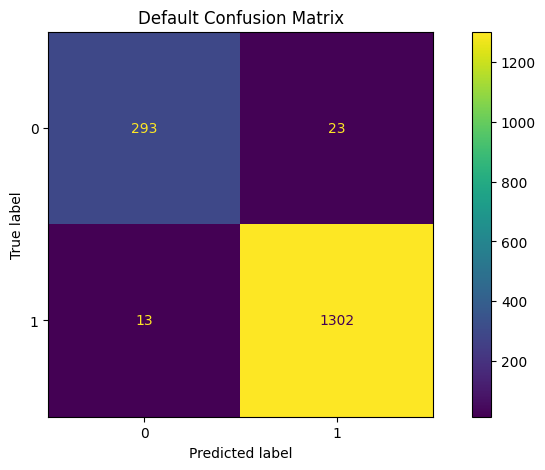

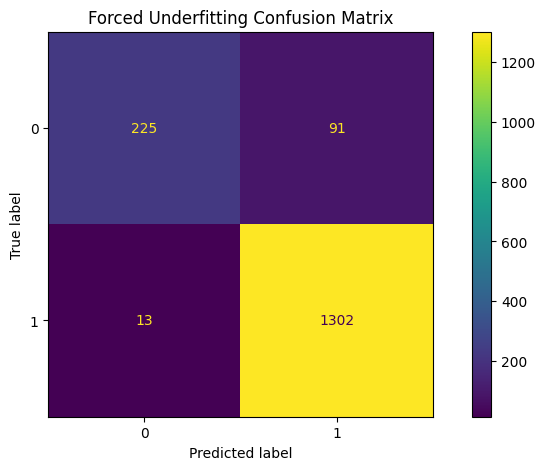

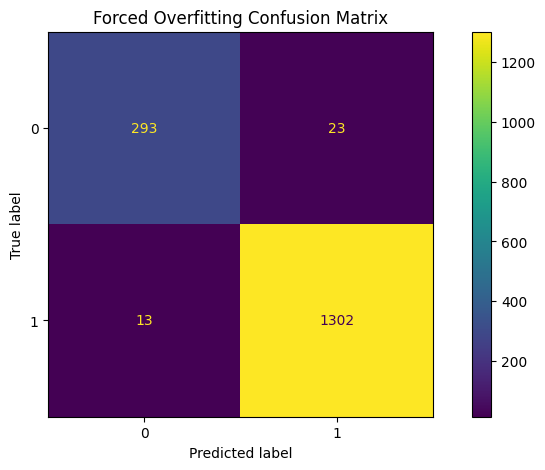

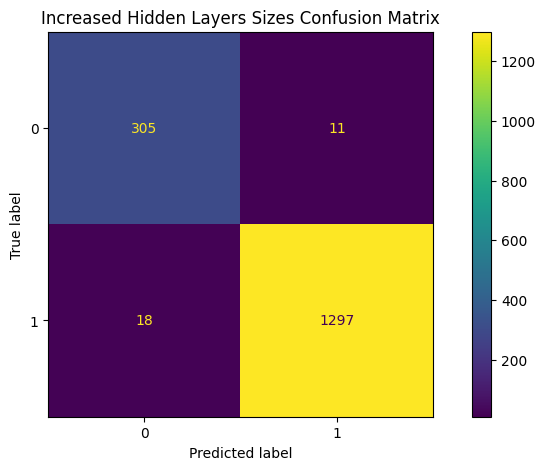

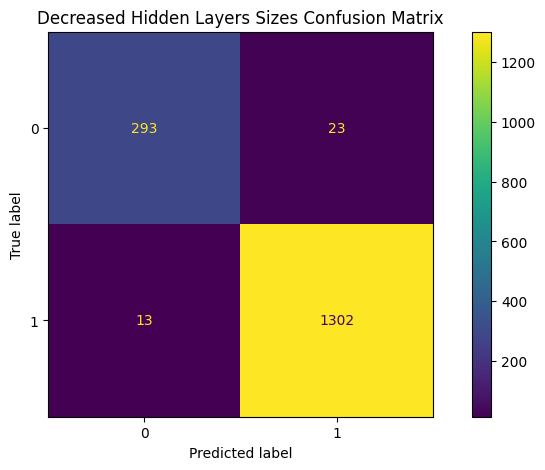

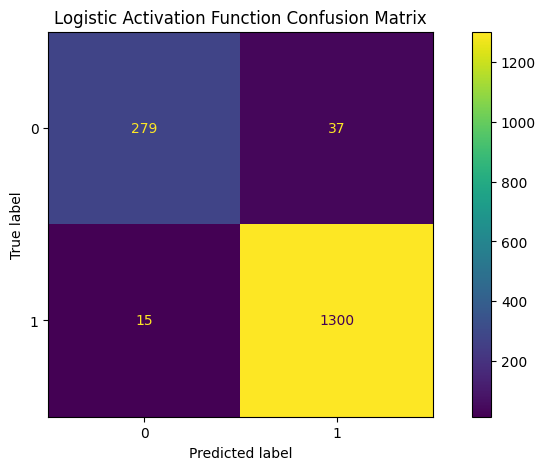

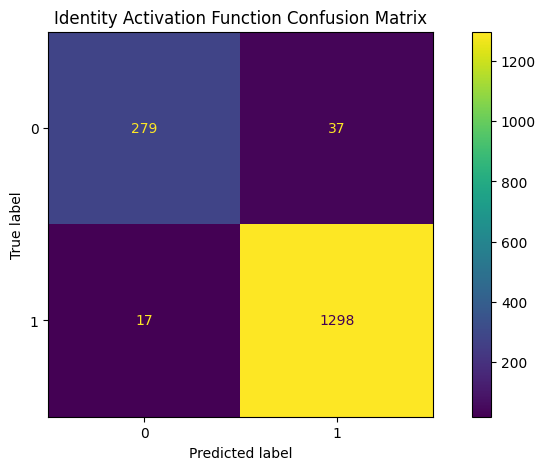

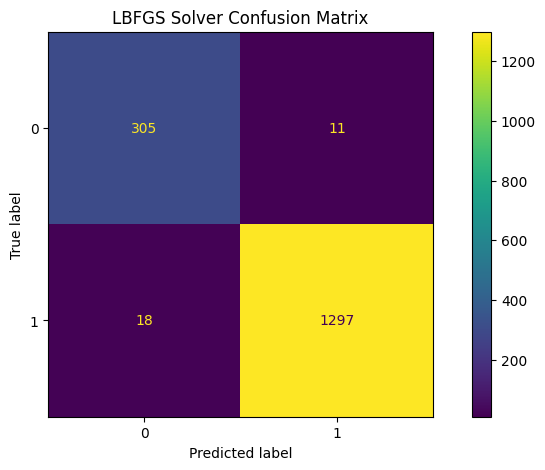

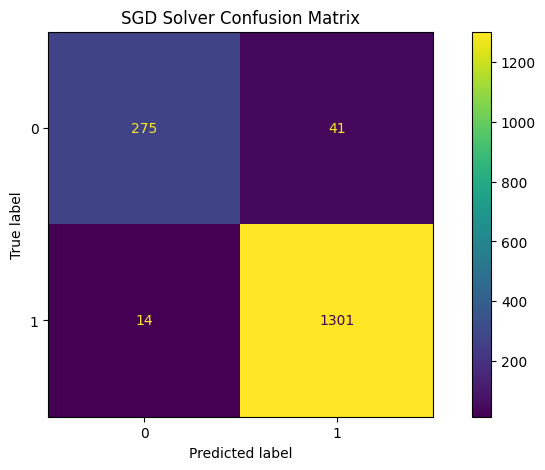

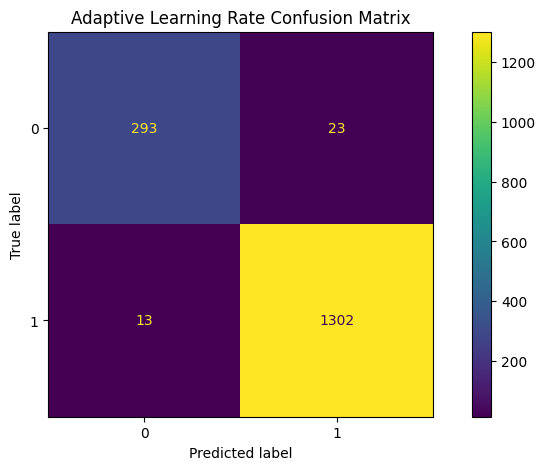

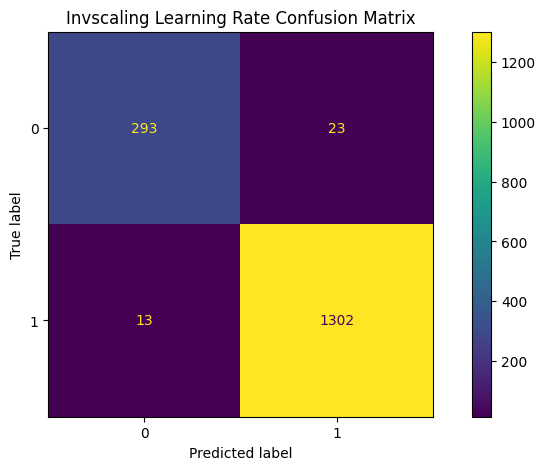

In [7]:
validations = []
accuracies_train = []
accuracies_test = []

# Retorna a porcentagem (em string) de um determinado float
percentage = lambda x : f"{round(x * 100, 2)}%"

for name, model in models.items():
    print(f"\033[93m-{name} Results-\033[0m")

    # Aplica o cross validation
    scores = cross_val_score(model, values, labels, cv=5)
    avg = np.mean(scores)
    validations.append(avg)
    print(f"Cross Validation Score: {avg}")

    # Teina o modelo em questão
    model = model.fit(values_train, labels_train)
    train_prediction = model.predict(values_train)
    train_accuracy = accuracy_score(labels_train, train_prediction)
    accuracies_train.append(train_accuracy)
    print(f"Train Accuracy: {percentage(train_accuracy)}")

    # Testa o modelo em questão
    test_prediction = model.predict(values_test)
    test_accuracy = accuracy_score(labels_test, test_prediction)
    accuracies_test.append(test_accuracy)
    print(f"Test Accuracy: {percentage(test_accuracy)}\n")

    # Plota a matriz de confusão
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(labels_test, test_prediction, ax=ax)
    _ = ax.set_title(f"{name} Confusion Matrix")

### Comparação dos desempenhos

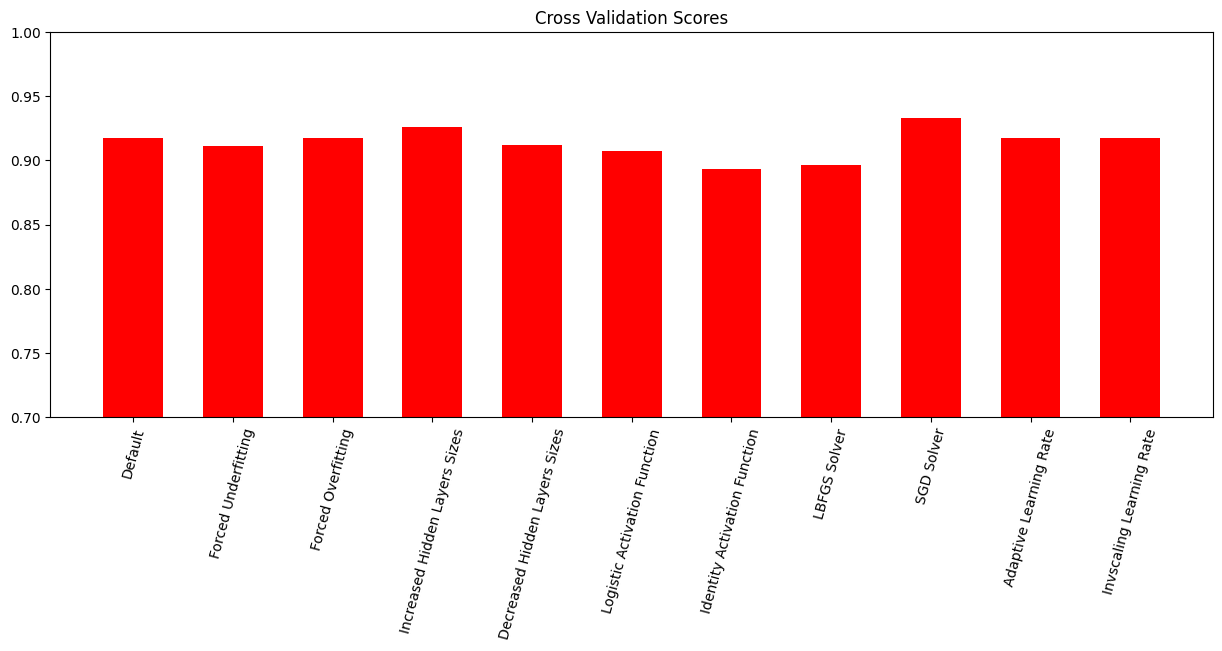

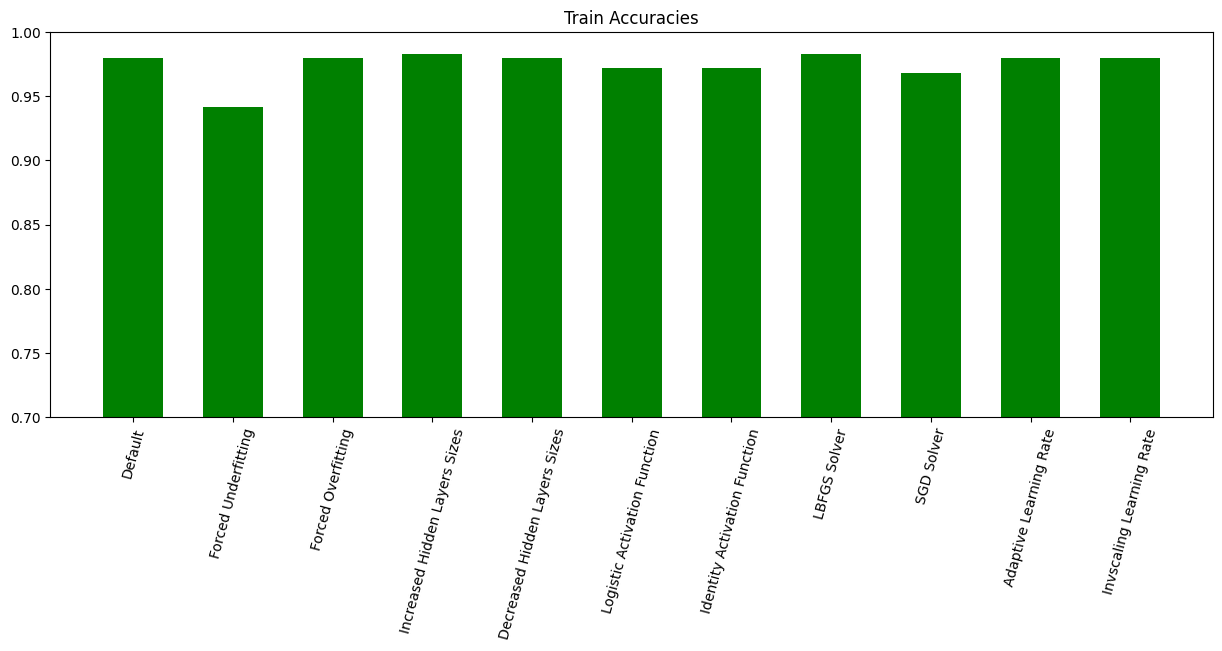

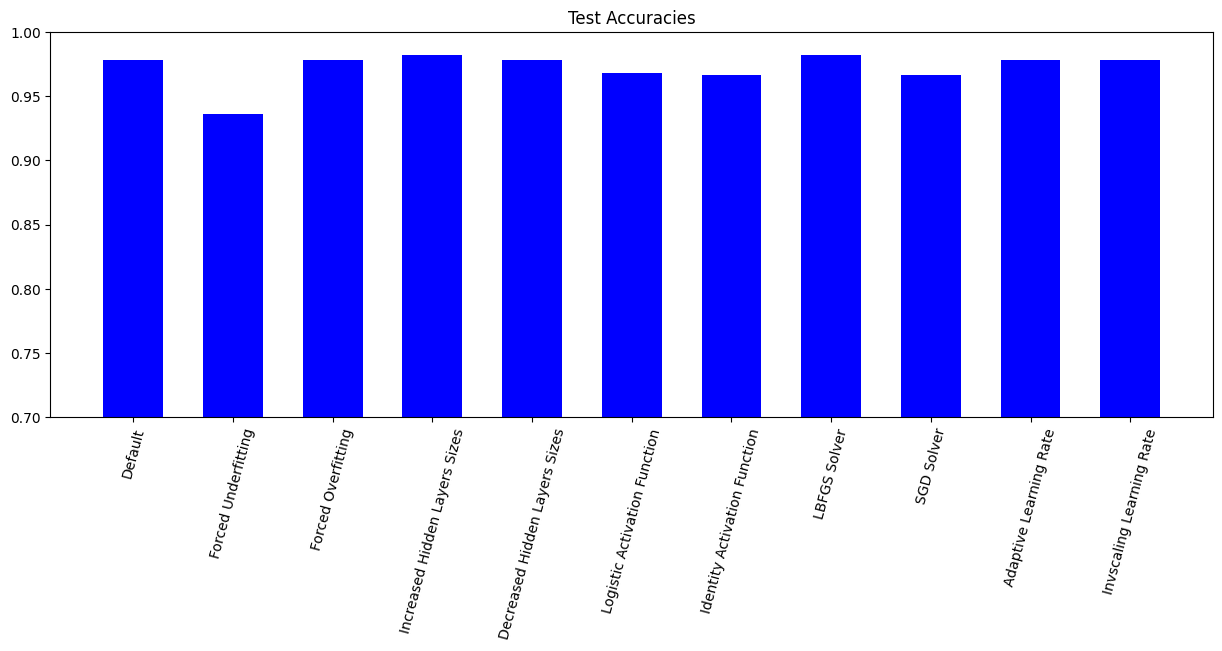

In [9]:
# Lista contendo as métricas a serem plotadas, seus títulos e cores
metrics = [
    (validations, "Cross Validation Scores", "red"),
    (accuracies_train, "Train Accuracies", "green"),
    (accuracies_test, "Test Accuracies", "blue")
]

for metric in metrics:
    # Plota o gráfico de barras da métrica em questão
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.title(metric[1])
    ax.bar(models.keys(), metric[0], width=0.6, color=metric[2])
    ax.set(ylim=(0.7, 1), yticks=np.arange(0.7, 1, 0.05))
    plt.xticks(rotation=75, fontsize=10)
    plt.show()